<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

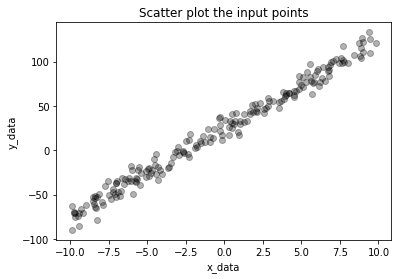

In [1]:
# 1. Input points [2pt]
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

#plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color= 'k', alpha=0.3)
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Scatter plot the input points')
plt.show()

In [2]:
# initial parameters
theta_0    = -30
theta_1    = -30

iterations = 1000         
lr      = 0.01           
m       = len(y_data)
J       = []
theta0  = []
theta1  = []

for i in range(iterations):
    h = theta_0 + theta_1 * x_data          
    
    cost = (1/(2*m))*sum((h-y_data)**2)     
    J.append(cost)
    
    theta_0 -= lr*(1/m)*sum(h-y_data)  
    theta0.append(theta_0)
    theta_1 -= lr*(1/m)*sum((h-y_data)*x_data)
    theta1.append(theta_1)
    
print('final theta_0: ', theta_0)
print('final theta_1: ', theta_1)

final theta_0:  24.904808174304186
final theta_1:  9.934595732258366


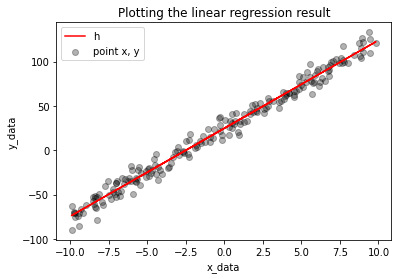

In [3]:
# 2. linear regression result [3pt]
#plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color= 'k', alpha=0.3, label='point x, y')
plt.plot(x_data, h, color="r", label='h')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.title('Plotting the linear regression result')
plt.legend(loc='upper left')
plt.show()

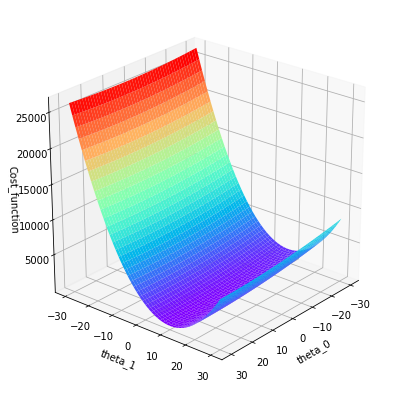

In [4]:
# 3. Plot the energy surface [4pt]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

def compute_cost(X, y_data, theta):
    return np.sum(np.square(np.matmul(X, theta) - y_data)) / (2 * len(y_data))

theta = [-30, -30]
X = np.column_stack((np.ones(len(x_data)), x_data))
cost = compute_cost(X, y_data, theta)

def gradient_descent(X, y_data, lr, iterations):
    theta = np.zeros(2)
    m = len(y_data)

    for i in range(iterations):
        theta_0 = theta[0] - (lr / m) * np.sum(np.dot(X, theta) - y_data)
        theta_1 = theta[1] - (lr / m) * np.sum((np.dot(X, theta) - y_data) * X[:,1])
        theta = np.array([theta_0, theta_1])

    return theta
    
theta = gradient_descent(X, y_data, lr, iterations)
cost = compute_cost(X, y_data, theta)

Xs, Ys = np.meshgrid(np.linspace(-30, 30, 600), np.linspace(-30, 30, 600))
Zs = np.array([compute_cost(X, y_data, [theta_0, theta_1]) for theta_0, 
               theta_1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost_function')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
plt.show()

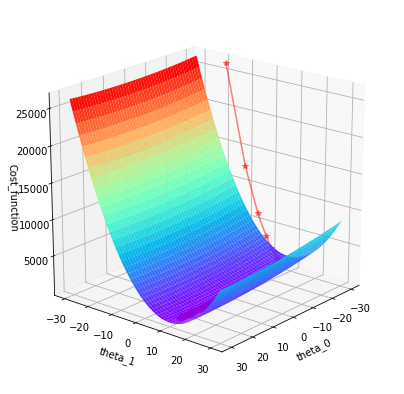

In [5]:
# 4. Plot the gradient descent path on the energy surface [5pt]
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost_function')
ax.view_init(elev=20, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)
ax.plot(theta0, theta1, J, marker = '*', color = 'r', alpha = 0.5)
plt.show()